# Окутин Денис ИУ9-11М - Лабораторная работа номер 2

## Общее

In [510]:
punctuation = r"""!"#$%&'()*+,-./:;<=>?@[\]^_`–{|}~—-"""
translator = str.maketrans('', '', punctuation)

## Очистка и предварительная обработка

In [511]:
text = open('text.txt').read()

lower = text.lower()
splitted = lower.split()
print(len(splitted))

118123


In [512]:
clean_words = []
for word in splitted:
    clean_word = word.translate(translator)
    if len(clean_word) > 0 and not clean_word.isnumeric():
        clean_words.append(clean_word)
        
print(len(clean_words))

112700


## Подсчёт частот слов

In [513]:
words_freq = {}
for word in clean_words:
    if word in words_freq:
        words_freq[word] += 1
    else:
        words_freq[word] = 1

In [514]:
N = 20
sorted_words_with_freq = dict(sorted(words_freq.items(), key=lambda word_freq: word_freq[1],reverse=True))

print(f"Топ {N} слов в тексте с их количеством:\n")
print(list(zip(sorted_words_with_freq.keys(),sorted_words_with_freq.values()))[:N])

Топ 20 слов в тексте с их количеством:

[('и', 5005), ('в', 3641), ('не', 2023), ('на', 2001), ('что', 1740), ('с', 1291), ('он', 1144), ('а', 957), ('я', 852), ('как', 836), ('но', 709), ('к', 698), ('его', 685), ('это', 636), ('же', 591), ('из', 528), ('у', 528), ('по', 474), ('за', 465), ('было', 464)]


In [515]:
sorted_words = list(sorted_words_with_freq.keys())

print(f"Топ {N} слов в тексте:\n")
print(sorted_words[:N])

Топ 20 слов в тексте:

['и', 'в', 'не', 'на', 'что', 'с', 'он', 'а', 'я', 'как', 'но', 'к', 'его', 'это', 'же', 'из', 'у', 'по', 'за', 'было']


In [516]:
stop_words="и, в, на, что, был, была, он, она, не, с, по, как, о, у, к, то, но, да, же, мы, вы, я, они, мне, его, её, их, а, из, за, от, так, это, под, ему, бы, ее, ни, ему, этого, того, тут, вот, еще, уже, нет, ты, до, где, когда, том, чтобы, него, меня, этот, со, ну, ли, тот, вас, все, через, было, вам, чем, себя, если, во, только, очень"
sw= stop_words.translate(translator).split()

In [517]:
removed_stop_words = {}
for word in sorted_words_with_freq:
    if word not in sw:
        removed_stop_words[word]=sorted_words_with_freq[word]

print(f"Топ {N} слов в тексте с их количеством (без стоп слов):\n")
print(list(zip(removed_stop_words.keys(),removed_stop_words.values()))[:N])

Топ 20 слов в тексте с их количеством (без стоп слов):

[('маргарита', 420), ('сказал', 275), ('иван', 241), ('ответил', 241), ('коровьев', 186), ('воланд', 185), ('прокуратор', 176), ('глаза', 169), ('время', 169), ('кот', 165), ('человек', 162), ('ничего', 153), ('спросил', 152), ('азазелло', 151), ('теперь', 145), ('совершенно', 140), ('пилат', 130), ('быть', 127), ('или', 123), ('перед', 122)]


In [518]:
sorted_words_after_clean = list(removed_stop_words.keys())

print(f"Топ {N} слов в тексте (без стоп слов):\n")
print(sorted_words_after_clean[:N])

Топ 20 слов в тексте (без стоп слов):

['маргарита', 'сказал', 'иван', 'ответил', 'коровьев', 'воланд', 'прокуратор', 'глаза', 'время', 'кот', 'человек', 'ничего', 'спросил', 'азазелло', 'теперь', 'совершенно', 'пилат', 'быть', 'или', 'перед']


## Визуализация результатов

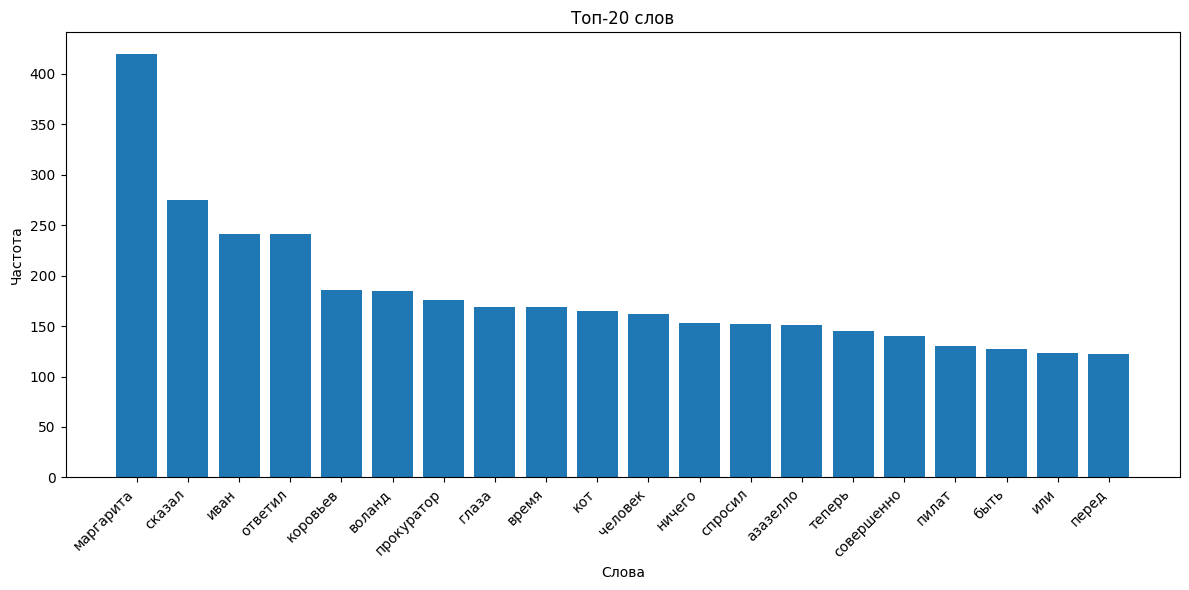

In [519]:
from matplotlib import pyplot as plt

words = list(removed_stop_words.keys())[:N]
counts = list(removed_stop_words.values())[:N]

plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Слова")
plt.ylabel("Частота")
plt.title("Топ-20 слов")
plt.tight_layout()
plt.show()

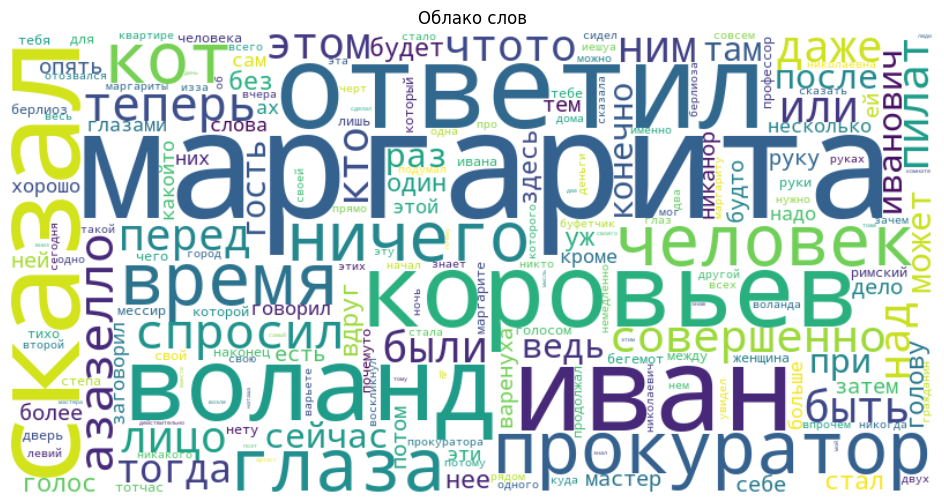

In [520]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(removed_stop_words)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Облако слов")
plt.show()

## Отчёт

*Какое произведение вы выбрали? Сколько в нём страниц?*

Мною было выбрано произведение Мастер и Маргарита. Мне кажется, не совсем релевантно считать страницы, конкретно тот, исходник, который я взял содержит 112 700 слов.
Текст взят - [здесь](https://bookscafe.net/book/bulgakov_mihail-master_i_margarita-79374.html?ysclid=mffkj4j6i9281965767)

*Какие 10 слов оказались наиболее частотными после удаления стоп-слов?*

После удаления стоп-слов, наиболее частноными стали:
- маргарита
- сказал 
- иван
- ответил
- коровьев
- воланд
- прокуратор
- глаза
- время
- кот

*Какие 5 лемм оказались самыми частотными?*

После удаления стоп-слов, наиболее частноные леммы:
- маргарита
- сказать 
- иван
- ответить
- коровьев

*Какие именованные сущности вы обнаружили? Приведите по 5 примеров персонажей и мест.*

Были обнаружены следующие именованные сущности:
- маргарита
- иван
- коровьев
- воланд
- азазелло
- пилат

*Что можно сказать о тематике и идее произведения на основе анализа частотных слов и лемм?*

На основе анализа частотных слов и лемм можно сказать о том, что произведение имеет повествовательный тип (из-за наличия глаголов и глагольных форм в топ 20), при этом сразу видны имена собственные, упоминание которых чаще всего встречаются в тексте (из этого можно сделать вывод, что это главные персонажи произведения)

P.s На удивление слово Мастер не попало в топ 20 слов, хотя и фигурирует в названии, и Мастер является одним из главных героев произведения.

*С какими трудностями вы столкнулись при обработке текста? (Например: архаичные слова, имена собственные, диалоги и т.д.)*

Одной из главных трудностей на начальном этапе было изменение кодировки текста, так как он скачивался в нечеловекочитаемой кодировке. В дальнейшем анализе была проблема с автомматизацией поиска лемм, поэтому пришлось анализировать их вручную (как бы самому подставляя начальную форму слова)

P.s Кодировку текста поменял с помощью

$ iconv -f CP1251 -t UTF-8 text.txt > fixed.txt